# Random Variable Distributions

**Instructions**
1. [Get the numerical variables from our dataset.](#1-|-Get-the-numerical-variables-from-our-dataset)
2. [Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.](#2-|-Check-using-a-distribution-plot-if-the-variables-fit-the-theoretical-normal-or-exponential-distribution)
3. [Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.](#3-|-Check-if-any-of-the-transformations-changes-the-result)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime

from sklearn import linear_model
from sklearn.metrics import mean_squared_error as unkind_squared_error, r2_score
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# don't see a nice easy alternative to seaborn distplot that looks as good...but apparently it is deprecated.
import warnings
warnings.filterwarnings("ignore")

### Some functions

In [3]:
def define_variable(df, unique_value_max=10):
    
    categorical = []
    num_continuous = []
    num_descrete = []
    dateandtimes = []
    for c in df.columns:
        if df[c].dtype == object:
            #print(c + " categorical")
            categorical.append(c)
        #elif type(df[c].dtype) is datetime.datetime:
        #elif df[c].dtype == np.datetime64:
        #elif is_datetime64_any_dtype(fd[c]):
        elif df[c].dtype == pd.to_datetime(df[c]): # 4th times a charm
            dateandtimes.append(c)
        else:
            if df[c].nunique() > unique_value_max:
                #print(c + " numerical - continuous")
                num_continuous.append(c)
            else:
                #print(c + " numerical - descrete")
                num_descrete.append(c)
        
        # maybe print the return order for added clarity on how to use function
        # is this going to throw a fit if we dont append anything to one of the vars...checked by passing back one of the split out dfs
                
    return df[categorical].copy(), df[num_continuous].copy(), df[num_descrete].copy(), df[dateandtimes].copy()
       
def plot_my_df(df):
    
    cat_features, num_continuous_features, num_descrete_features, df_dates = define_variable(df)
    
    if len(cat_features.columns) > 0:
        print()
        print()
        print()
        sns.set(rc = {'figure.figsize':(16,(math.ceil(cat_features.columns[1:].nunique()/2)*5))})
        fig = plt.figure()
        fig.subplots_adjust(hspace=.4, wspace=0.4)
        fig.tight_layout()
        fig.subplots_adjust(top=0.96)

        i = 1
        for c in cat_features.columns[1:]: #skip customer
            ax = fig.add_subplot(math.ceil(cat_features.columns[1:].nunique()/2), 2, i)
            ax.set(title='Does this make me a title for the group')
            i = i + 1
            ax = sns.countplot(x=c, data=df, ax=ax, order=df[c].value_counts().index)        
            ax.set(xlabel=None, ylabel=None, title=unsnake(c))
        plt.suptitle('Introducing the.....Categoricals and their Row Counts') 
        plt.show()
    
    if len(num_descrete_features.columns) > 0:
        print()
        print()
        print()
        sns.set(rc = {'figure.figsize':(16,(math.ceil(num_descrete_features.columns.nunique()/2)*5))})
        fig = plt.figure()
        fig.subplots_adjust(hspace=.4, wspace=0.4)
        fig.subplots_adjust(top=0.8) # 
        i = 1
        for c in num_descrete_features.columns: #skip customer
            ax = fig.add_subplot(math.ceil(num_descrete_features.columns.nunique()/2), 2, i)
            i = i + 1
            ax = sns.countplot(y=c, data=df, ax=ax)        
            ax.set(xlabel=None, ylabel=None, title=unsnake(c))
        plt.suptitle('Introducing the.....Numerical Discrete and their Row Counts')
        plt.show()
    
    if len(num_continuous_features.columns) > 0:
        print()
        print()
        print()
        sns.set(rc = {'figure.figsize':(16,(math.ceil(num_continuous_features.columns.nunique()/2)*4))})
        fig = plt.figure()
        fig.subplots_adjust(hspace=.4, wspace=0.4)
        fig.subplots_adjust(top=0.90)
        i = 1
        for c in num_continuous_features.columns: #skip customer
            ax = fig.add_subplot(math.ceil(num_continuous_features.columns.nunique()/2), 2, i)
            #ax = sns.swarmplot(x=c, data=df, color=".25")
            i = i + 1
            ax = sns.violinplot(x=c, data=df, ax=ax) 
            ax.set(xlabel=None, ylabel=None, title=unsnake(c))
        plt.suptitle('Introducing the.....Numerical Continuous and their Row Counts with a splash of Distribution')
        plt.show()

        print()
        print()
        print()
        sns.set(rc = {'figure.figsize':(16,(math.ceil(num_continuous_features.columns.nunique()/2)*4))})
        fig = plt.figure()
        fig.subplots_adjust(hspace=.4, wspace=0.4)
        fig.subplots_adjust(top=0.90)
        i = 1
        for c in num_continuous_features.columns: #skip customer
            ax = fig.add_subplot(math.ceil(num_continuous_features.columns.nunique()/2), 2, i)
            #ax = sns.swarmplot(x=c, data=df, color=".25")
            i = i + 1
            ax = sns.boxplot(x=c, data=df, ax=ax) 
            ax.set(xlabel=None, ylabel=None, title=unsnake(c))
        plt.suptitle('Introducing the.....Continuous Discrete again and their Row Counts with a splash of Distribution with a focus on outliers and extra long titles')
        plt.show()
    
    if len(df_dates.columns) > 0:
        print()
        print()
        print()
        sns.set(rc = {'figure.figsize':(16,(math.ceil(df_dates.columns.nunique()/2)*5))})
        fig = plt.figure()
        fig.subplots_adjust(hspace=.4, wspace=0.4)
        fig.subplots_adjust(top=0.80)
        i = 1
        for c in df_dates.columns: #skip customer
            ax =  fig.add_subplot(math.ceil(df_dates.columns.nunique()/2), 1, i)
            i = i + 1
            ax = sns.lineplot(x=df[c].value_counts().keys().tolist(),y=df[c].value_counts().tolist(), ax=ax)
            ax.set(ylabel=None, title=unsnake(c))
        plt.suptitle('Oh, hI thaR dAtes')
        plt.show()
        
        
def unsnake(text):
    return text.replace("_"," ").title()

def plot_my_distro(df, in_cols=2, group_title=""):
    print((math.ceil(df.shape[1]/in_cols)*4))
    sns.set(rc = {'figure.figsize':(16,(math.ceil(df.shape[1]/in_cols)*4))})
    fig = plt.figure()
    fig.subplots_adjust(hspace=.4, wspace=0.4)
    fig.subplots_adjust(top=0.90)
    i = 1
    for c in df.columns: #skip customer
        ax = fig.add_subplot(math.ceil(df.shape[1]/in_cols), in_cols, i)
        #ax = sns.swarmplot(x=c, data=df, color=".25")
        i = i + 1
        ax = sns.distplot(df[c], ax=ax) 
        ax.set(xlabel=None, ylabel=None, title=unsnake(c))
    plt.suptitle(group_title)
    plt.show()
        
        
def scale_me_please(df, numericals_for_minmaxscaler=[], numericals_for_starndardscaler=[], refit=True):
    global minmaxtransformer 
    # min_max_scaler
    if len(numericals_for_minmaxscaler) > 0:
        minmaxscaler_numericals = df[numericals_for_minmaxscaler]    

        X = minmaxscaler_numericals
        if refit:
            minmaxtransformer = MinMaxScaler().fit(X)
        x_normalized = minmaxtransformer.transform(X)
        minmaxscaled = pd.DataFrame(x_normalized, columns=X.columns)
        # replace df columns with mm scaled columns
        df = df.drop(numericals_for_minmaxscaler, axis=1)
        minmaxscaled.reset_index()
        df = pd.concat([df,minmaxscaled],axis=1)
    # standard_scaler
    if len(numericals_for_starndardscaler) > 0:
        standardscaler_numericals = df[numericals_for_starndardscaler]

        X = standardscaler_numericals
        if refit:
            standardtransformer = StandardScaler().fit(X)
        x_standardized = standardtransformer.transform(X)
        x_standardized = pd.DataFrame(x_standardized,columns=X.columns)

        # replace df columns with mm scaled columns
        df = df.drop(standardscaler_numericals, axis=1)
        df = pd.concat([df,x_standardized],axis=1)

    return df

def log_it(df, columns_to_log):
    df = df.copy()
    for c in df[columns_to_log]:
        df[c] = list(map(lambda x:np.log(x) if x!=0 else x,df[c]))
    return df

# 1 | Get the numerical variables from our dataset

In [4]:
#load the file:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [5]:
nums = customer_df.select_dtypes(np.number)

# 2 | Check using a distribution plot if the variables fit the theoretical normal or exponential distribution

16


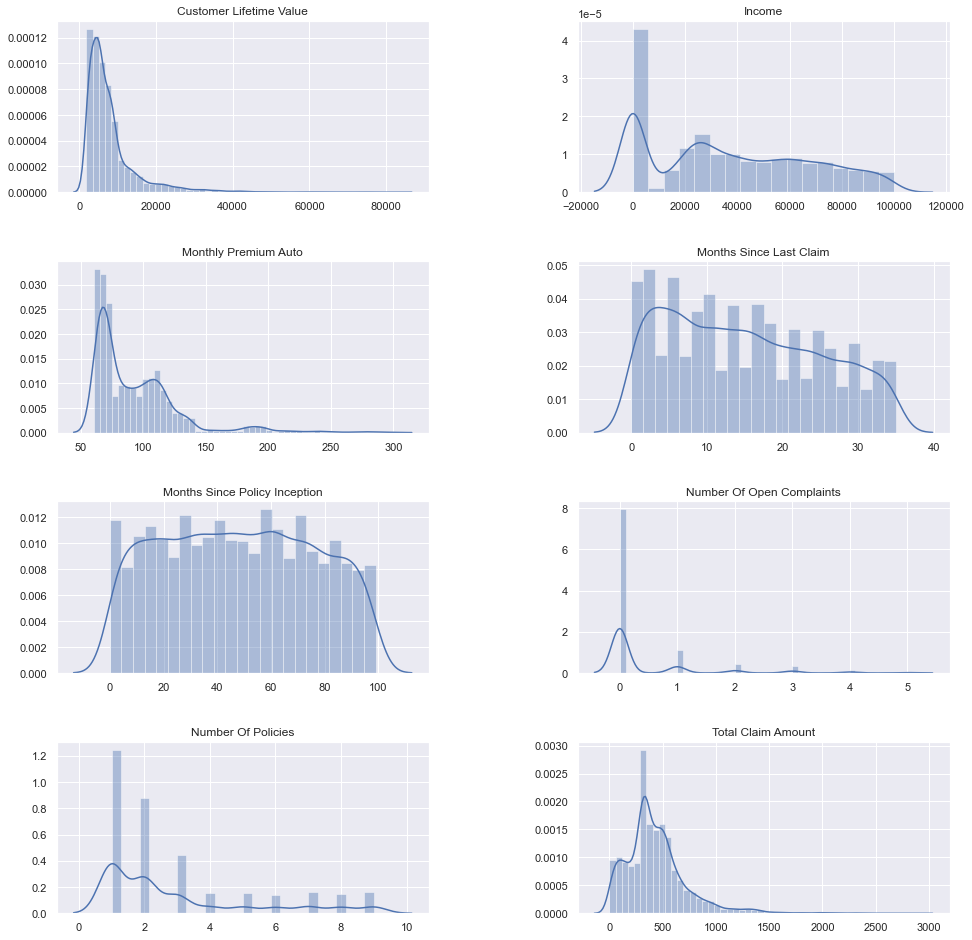

In [6]:
plot_my_distro(nums)

The majority of our numerical columns are exponential, though mpnths since policy inception is more of a uniform distribution.\
Months since last claim seems to have a has steady consistant decline, though I also wouldn't cosnider this to be continuous.\
The function was splitting continous/descrete based on number of categories rather than if it can only be ints...

# 3 | Check if any of the transformations changes the result

check if log and other transforms change our result

In [7]:
cat_features, num_continuous_features, num_descrete_features, df_dates = define_variable(nums)

In [8]:
def add_to_column_title(df, text):
    for c in df.columns:
        print(c + " to " + c + " " + text)
        df = df.rename(columns={c:c + " " + text})
    return list(df.columns)

nums_logged = log_it(num_continuous_features,num_continuous_features.columns).copy()
nums_logged.columns = add_to_column_title(nums_logged, 'Logged')

nums_minmax = scale_me_please(num_continuous_features, numericals_for_minmaxscaler=num_continuous_features.columns, refit=True).copy()
nums_minmax.columns = add_to_column_title(nums_minmax, text='MinMax')
    
nums_std = scale_me_please(num_continuous_features, numericals_for_starndardscaler=num_continuous_features.columns, refit=True).copy()
nums_std.columns = add_to_column_title(nums_std, text='Standard')

Customer Lifetime Value to Customer Lifetime Value Logged
Income to Income Logged
Monthly Premium Auto to Monthly Premium Auto Logged
Months Since Last Claim to Months Since Last Claim Logged
Months Since Policy Inception to Months Since Policy Inception Logged
Total Claim Amount to Total Claim Amount Logged
Customer Lifetime Value to Customer Lifetime Value MinMax
Income to Income MinMax
Monthly Premium Auto to Monthly Premium Auto MinMax
Months Since Last Claim to Months Since Last Claim MinMax
Months Since Policy Inception to Months Since Policy Inception MinMax
Total Claim Amount to Total Claim Amount MinMax
Customer Lifetime Value to Customer Lifetime Value Standard
Income to Income Standard
Monthly Premium Auto to Monthly Premium Auto Standard
Months Since Last Claim to Months Since Last Claim Standard
Months Since Policy Inception to Months Since Policy Inception Standard
Total Claim Amount to Total Claim Amount Standard


In [9]:
display(num_continuous_features.head())
display(nums_logged.head())
display(nums_minmax.head())
display(nums_std.head())

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


,Customer Lifetime Value Logged,Income Logged,Monthly Premium Auto Logged,Months Since Last Claim Logged,Months Since Policy Inception Logged,Total Claim Amount Logged
0,7.924260,10.937988,4.234107,3.465736,1.609438,5.952753
1,8.850738,0.000000,4.543295,2.564949,3.737670,7.031268
2,9.464008,10.794809,4.682131,2.890372,3.637586,6.339428
3,8.941920,0.000000,4.663439,2.890372,4.174387,6.272653
4,7.942253,10.688211,4.290459,2.484907,3.784190,4.928202


,Customer Lifetime Value MinMax,Income MinMax,Monthly Premium Auto MinMax,Months Since Last Claim MinMax,Months Since Policy Inception MinMax,Total Claim Amount MinMax
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.047710


,Customer Lifetime Value Standard,Income Standard,Monthly Premium Auto Standard,Months Since Last Claim Standard,Months Since Policy Inception Standard,Total Claim Amount Standard
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.169640
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,2.400737
2,0.710636,0.365710,0.429596,0.288205,-0.360680,0.455734
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,0.329769
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-1.018843


24


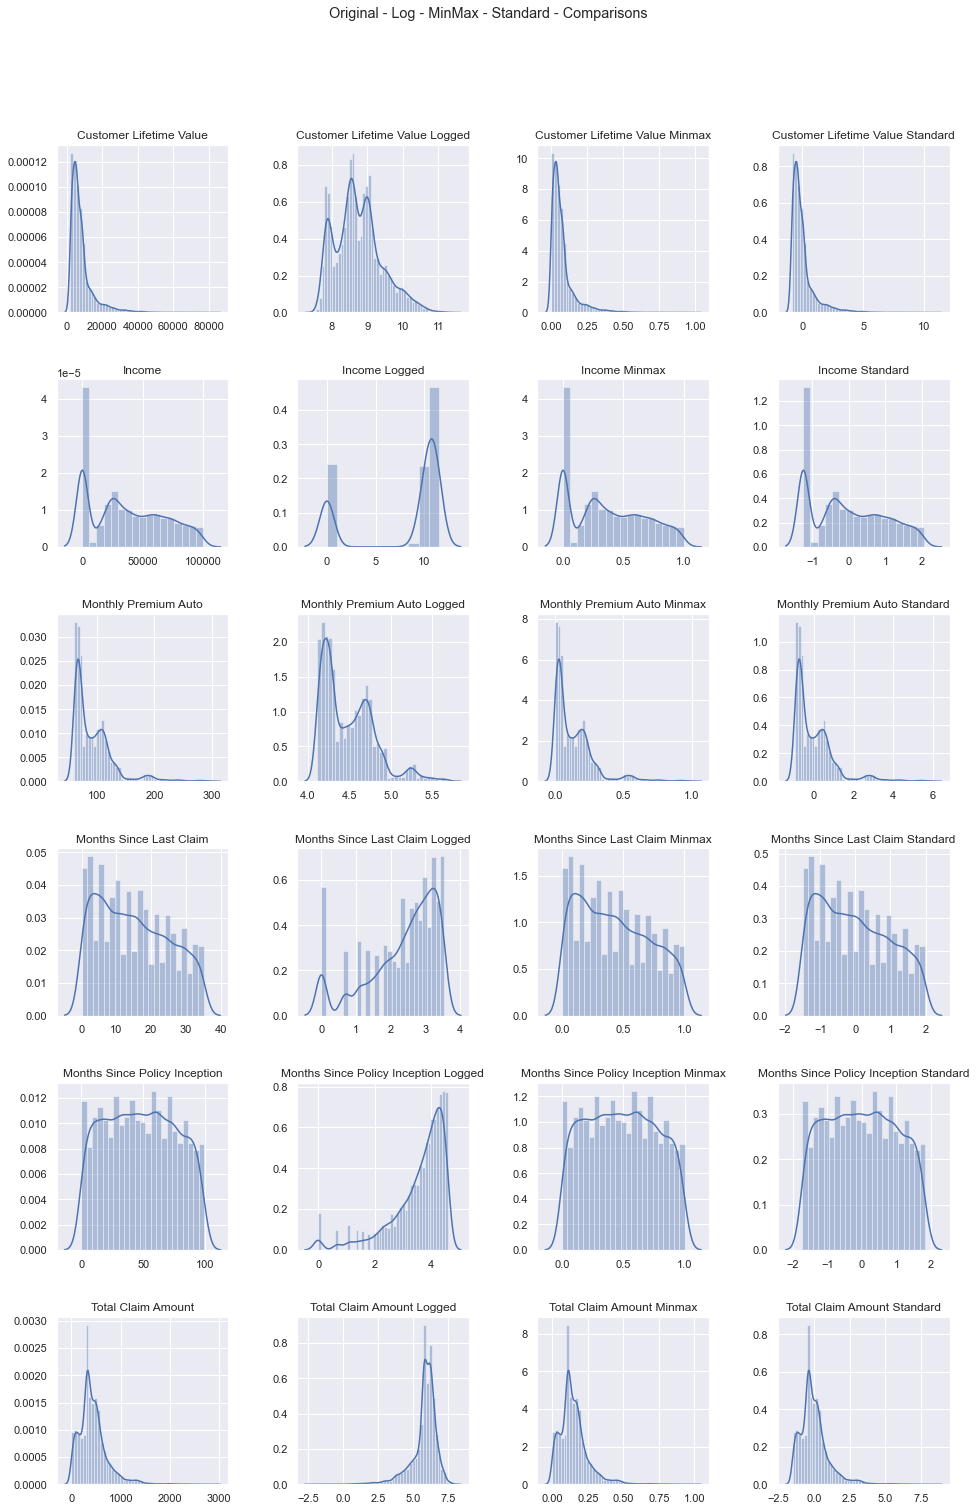

In [10]:
combined_df = pd.DataFrame()
for c in num_continuous_features.columns:
    combined_df = pd.concat([combined_df, num_continuous_features[c], nums_logged[c + " Logged"], nums_minmax[c + " MinMax"], nums_std[c + " Standard"]], axis = 1)


plot_my_distro(combined_df, in_cols=4, group_title='Original - Log - MinMax - Standard - Comparisons')

*Log trends towards a more normalized distribution while scaling transformations have no impact on the distribution, ...only the (surprise surprise) scale*